# Trabajo Práctico 1 - Matrices de Insumo Producto

---

### Consigna 1 - Análisis del sistema según $(I-A)$ y $d$

Empezamos por el caso en el que $(I-A)$ es inversible y asumimos que $d=0$ para poder diferenciarlo del siguiente caso de análisis. Cuando sucede esto, tenemos un sistema **compatible determinado** el cual tendrá solución única para un $d$ determinado no nulo.

Por otro lado, si $(I-A)$ continua siendo inversible pero ahora asumimos que $d=0$, entonces tenemos un sistema homogéneo. A partir de que sabemos que la matriz de Leontief es inversible, por ende, tiene $dim(Ker(L)) = 0$. Por lo tanto, la única respuesta al sistema es $p=0$, la solución trivial. Esto también es más palpable al partir del sistema (1).

$$p=A\cdot p+d$$

$$d=0\Rightarrow p=A\cdot p\Longleftrightarrow (I-A)\cdot p = 0$$

$$\Longleftrightarrow p=0$$

Luego, tenemos el caso de un sistema en el que la matriz de Leontief no es inversible y, además, $d\neq 0$. En esta situación, ni siquiera podríamos plantear la ecuación que veníamos viendo, llegaríamos a que $p\cdot (I-A) = d$ y no podríamos invertir $L$ para conseguir $p$. Nos quedaríamos con que el sistema tiene dos posibles casos: **compatible indeterminado** e **indeterminado**. Ahora, si el vector $d$ llega a estar incluido en la imagen de la matriz de nuestro sistema, el sistema va a ser compatible indeterminado, habría infinitas soluciones. En el caso contrario ($d$ no pertenece a la imagen), el sistema no va a tener solución, deberíamos de llegar a un absurdo.

Por último, el caso de $(I-A)$ no inversible y $d=0$, automáticamente pasamos a un sistema homogéneo en el que la matriz que tenemos tiene $dim(Ker(I-A))\neq0$, es decir, tendríamos infinitas soluciones porque es un sistema **compatible no determinado**. Sería como resolver el núcleo de la matriz en cuanto a $p$.

---

### Consigna 2 - Descomposición $LU$ e inversa

Ver en `funciones.py` la definición de cada función con su correspondiente desarrollo y *docstring*.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from funciones import calcularLU, inversaLU

---

### Consigna 3 - Caso de resolución especifico 

Hay que resolver el sistema usando la función `inversaLU` para los siguientes valores de $A$ y $d$. 

$$
A =
    \begin{pmatrix}
    0.3 & 0  & 0.1\\
    0.05 & 1.0 & 0.2\\
    0.1 & 0.15 & 0.1 \\
    \end{pmatrix}

\qquad

d = \begin{pmatrix}
    100 \\
    100 \\
    300 \\
    \end{pmatrix}
$$

Vamos a usar las funciones y matrices para calcular el sistema. 

In [2]:
# Declaro A y d
A = np.array([
    [.3, .0, .1],
    [.05, 1.0, .2],
    [.1, .15, .1]
])
d = np.array([[100], [100], [300]])

# Consigo la matriz (I - A) (M) y la descompongo
M = (np.eye(A.shape[0]) - A)
L, U, P = calcularLU(M)

# Invierto la matriz y resuelvo el sistema
invLU = inversaLU(L, U, P)
p = invLU @ d
print("Vector solución:\n", p, sep="")


Vector solución:
[[   68.96551724]
 [-5149.42528736]
 [ -517.24137931]]


Vemos que la solución al sistema parece ser bastante peculiar en el sentido de que la segunda y tercer posición del vector producción son negativas y, además, la segunda posición es mucho mayor en valor absoluto que el resto de componentes. No tiene sentido que un sistema nos informe que nuestro vector $p$ de total producido tiene componentes negativos e incluso de gran magnitud en relación al anterior $p$, es como decir que nos falta producir. Creemos que esto indica que el sistema consumé más de lo que produce y/o que la demanda es mucho más alta de lo que el sistema puede llegar a producir. 

Sospechamos que la característica de la matriz que hace que esto sea así es que $(A)_{2,2} = 1$. Esto sugiere que para llegar a la producción $p$ siguiente, necesitamos el 100% de ese sector dedicado a el mismo. Creemos fuertemente que la suma de cada fila no debería exceder 1 para tener un sistema sostenible. De todas formas, esto no involucra un cambio potencial para la demanda.

---

### Consigna 4 - Análisis de $\Delta p$ según un $\Delta d$ en Consigna 3

(Ver que afecta a la tercer col de Leontief)

Ahora deberíamos ver que sucede (analíticamente) si perturbamos el sistema con un $\Delta d$, osea, ver que sucede cuando aumentamos la demanda con $\Delta d = (0, 0, 1)^t$. Usar este vector sería como aumentar en la demanda en el tercer sector por una única unidad. Veamos como queda el sistema a partir de la introducción del *shock*, empezamos con el sistema de antes pero anticipamos que vamos a tener una $\Delta p$ relativamente "chica" a la obtenida en la Consigna 3. 

$$p'=L\cdot d' \Longleftrightarrow p + \Delta p = L \cdot (d + \Delta d)$$

$$\Rightarrow \Delta p = L\cdot d + L\cdot\Delta d - p$$

Por definición, sabemos que $p = L\cdot d$, entonces:

$$\Longrightarrow \Delta p = L\cdot\Delta d$$

Vemos que solo necesitamos procesar el shock por separado para entender como va a afectar a la producción total.

In [3]:
# Declaro el shock
delta_d = np.array([[0], [0], [1]])

# Ya tenemos la matris de Leontief en memoria
delta_p = invLU @ delta_d
print("Vector solución con shock:\n", delta_p, sep="")


Vector solución con shock:
[[ 0.        ]
 [-6.66666667]
 [ 0.        ]]


Es bastante interesante que un aumento de demanda en el tercer sector genere que la producción total se vea afectado en el segundo sector, algo que no esperábamos. Sumado a esto, podemos ver que hay un leve aumento en módulo de parte del shock que se produjo. Aclaramos que el hecho de que la demanda sea $e_3$ implica que se utilice la tercera columna de la matriz de Leontief para determinar la producción.

---

### Consigna 5 - Coeficientes técnicos

Vemos que, según lo que informan, tenemos que la matriz de coeficientes técnicos es $A = Z\cdot P^{-1}$, sabemos que $Z$ representa la demanda interna y la $P$ es el total producido. Por ende:

$$A = Z\cdot P^{-1} =
\begin{pmatrix}
    350 & 0 & 0 \\
    50 & 250 & 150 \\
    200 & 150 & 550 \\
\end{pmatrix}
\cdot
\begin{pmatrix}
    \frac{1}{1000} & 0 & 0 \\
    0 & \frac{1}{500} & 0 \\
    0 & 0 & \frac{1}{1000}\\
\end{pmatrix} =
\begin{pmatrix}
    0.35 & 0 & 0 \\
    0.05 & 0.5 & 0.15 \\
    0.2 & 0.3 & 0.55 \\
\end{pmatrix}
$$

Ahora que sabemos la matriz $A$ podemos calcular tranquilamente su inversa con el código previamente establecido:


In [4]:
# Defino A
A = np.array([
    [.35, 0, 0],
    [.05, .5, .15],
    [.2, .3, .55]
])

# Calculo la inversa via descomposición LU
M = np.eye(3) - A
L, U, P = calcularLU(M)
leontief = inversaLU(L, U, P)

print(leontief)

[[1.53846154 0.         0.        ]
 [0.44871795 2.5        0.83333333]
 [0.98290598 1.66666667 2.77777778]]


Esta sería la matriz de Leontief para la economía propuesta por la consigna. 

---

## Consigna 6 - Demostración de Ecuación de Modelo Inter Regional

Partimos del hecho de que sabemos como se que un sistema inter regional y que, por imposición, tenemos que el *shock* de demanda de Nicaragua es nulo.

$$
\left[
\begin{pmatrix}
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m}
\end{pmatrix}
-
\begin{pmatrix}
A ^{rr} & A ^{rs} \\
A ^{sr} & A ^{ss}
\end{pmatrix}
\right]
\cdot
\begin{pmatrix}
\Delta p^r \\
\Delta p^s
\end{pmatrix}
=
\begin{pmatrix}
\Delta d ^ r\\
0
\end{pmatrix}
$$

$$
\Rightarrow
\begin{pmatrix}
I - A ^{rr} & -A ^{rs} \\
-A ^{sr} & I - A ^{ss}
\end{pmatrix}
\cdot
\begin{pmatrix}
\Delta p^r \\
\Delta p^s
\end{pmatrix}
=
\begin{pmatrix}
\Delta d ^ r\\
0
\end{pmatrix}
$$

$$
\Rightarrow
\begin{cases}
(I - A ^{rr}) \cdot \Delta p^r - A^{rs} \cdot \Delta p^s = \Delta d ^ r \quad (1) \\
- A ^{sr} \cdot \Delta p^r + (I - A^{ss}) \cdot \Delta p^s = 0 \quad (2)
\end{cases}
$$

De (2) vemos que podemos llegar a una igualdad para $\Delta p^s$: 

$$ (I - A^{ss}) \cdot \Delta p^s =  A ^{sr} \cdot \Delta p^r $$

$$
\Delta p^s = (I - A^{ss})^{-1} \cdot A ^{sr} \cdot \Delta p^r
$$

Reemplazando en (1) tenemos que: 

$$ (I - A ^{rr}) \cdot \Delta p^r - A^{rs} \cdot (I - A^{ss})^{-1} \cdot A ^{sr} \cdot \Delta p^r = \Delta d^r $$

$$ \Rightarrow  \Delta p^r\cdot((I - A ^{rr}) - A^{rs} \cdot (I - A^{ss})^{-1} \cdot A ^{sr}) = \Delta d^r $$

Queda demostrado lo propuesto por el ejercicio pero además observamos que, para obtener el $\Delta p^r$ de un sistema inter regional, necesitamos primero calcular la demanda a partir de lo encontrado con esta matriz de Leontief y la producción total. Luego podríamos abordar los deltas ya que sabemos por la Consigna 4 que el calculo de $P$ y $\Delta P$ se da por separado. 

$$
\begin{align}
    d^r &= p^r \cdot[I - A^{rr} - A^{rs} \cdot (I - A^{ss})^{-1} \cdot A^{sr}] \\
    \Delta p^r &= [I - A^{rr} - A^{rs} \cdot (I - A^{ss})^{-1} \cdot A^{sr}]^{-1} \cdot \Delta d^r
\end{align}
$$

---

### Consigna 7 - Sistema Insumo Producto entre países

<u>Aclaración</u>: ¡GTM es el primer país!

Tenemos el contexto de que hay que resolver un sistema que relaciona dos países. En el caso del grupo, los países son Guatemala (GTM y Nicaragua (NIC). Para ambos países tenemos 40 sectores, esto quiere decir que la matriz Insumo Producto de este sistema es de 80x80. Hay un pequeño detalle que puede afectar a como armar las matrices $A = Z\cdot P^{-1}$, hay algunos sectores que parecen ser nulos en su producción, no es bueno porque implica que $P$ podría tener división por 0 en alguna/s de sus posiciones. Para evitar esto, reemplazamos todos los 0 por 1, esto no debería ser un cambio significativo.

In [5]:
# Cargo la data que esta en formato csv
df = pd.read_csv(r"data_paises.csv")

# Selecciono GTM y NIC, Guatemala y Nicaragua
df_gtm = df[df["Country_iso3"] == "GTM"]
df_nic = df[df["Country_iso3"] == "NIC"]

# Consigo los P 
P_gtm = df_nic["Output"]
P_nic = df_nic["Output"]

# Veo los que tengan producción nula
suma_nulos_P_gtm = sum([1 for i in P_gtm if i == 0])
suma_nulos_P_nic = sum([1 for i in P_nic if i == 0])
print("Conteo de producción nula en GTM:", suma_nulos_P_gtm)
print("Conteo de producción nula en NIC:", suma_nulos_P_nic)


Conteo de producción nula en GTM: 7
Conteo de producción nula en NIC: 7


Vemos que para ambos países hay 7 sectores que tienen producción nula. En la siguiente celda ejecutamos un cambio de los ceros por unos para poder conseguir las matrices $A$ sin problema.

In [6]:
# Cambio los 0s a 1s para poder conseguir las A
P_nic = np.array(P_nic.replace({0:1}))
P_gtm = np.array(P_gtm.replace({0:1}))

Ahora si podemos calcular las matrices $A$ correspondientes a cada región y las inter regionales. 

In [7]:
# Creo cuatro df que representan las matrices Z
df_gtm_gtm = df_gtm[[col for col in df_gtm.columns if (col.startswith("GTM"))]]
df_gtm_nic = df_gtm[[col for col in df_gtm.columns if (col.startswith("NIC"))]]
df_nic_gtm = df_nic[[col for col in df_nic.columns if (col.startswith("GTM"))]]
df_nic_nic = df_nic[[col for col in df_nic.columns if (col.startswith("NIC"))]]

# Mando a matriz de coef. técnicos
A_nic_nic = np.array(df_nic_nic) / P_nic
A_nic_gtm = np.array(df_nic_gtm) / P_gtm
A_gtm_nic = np.array(df_gtm_nic) / P_nic
A_gtm_gtm = np.array(df_gtm_gtm) / P_gtm

Bien, de momento tenemos las matrices que nos permiten calcular apropiadamente el sistema. Sólo falta resolver el sistemas con lo que sabemos de la Consigna 6. Sabemos que tenemos que resolver el sistema asumiendo que $r$ representa a Guatemala y $s$ a Nicaragua. Tenemos que:

$$ d^r = (I- A^{rr} - A^{rs}\cdot(I-A^{ss})^{-1}\cdot A^{sr})\cdot p^r$$

$$\Delta p^r = (I- A^{rr} - A^{rs}\cdot(I-A^{ss})^{-1}\cdot A^{sr})^{-1}\cdot\Delta d^r$$

Necesitamos primero calcular $d^r$ para luego poder hacer el calculo apropiado del *shock* que queremos introducir en el sistema con $\Delta d^{r}$ en Guatemala. Aclaramos que la matriz $(I-A^{ss})^{-1}$ va a figurar como $L^{ss}$ en el código y la vamos a procesar con las funciones previamente utilizadas para el calculo de inversa. La matriz de Leontief del sistema total va a ser $B$.

In [8]:
# Calculo la demanda del primer país (GTM)
M_nic_nic = np.eye(40) - A_nic_nic
L, U, P = calcularLU(M_nic_nic)
L_nic_nic = inversaLU(L, U, P)
B = (np.eye(40) - A_gtm_gtm - A_gtm_nic @ L_nic_nic @ A_nic_gtm)  # Matriz resolución
D_gtm = P_gtm @ B  # Demanda de guatemala modelo inter regional

In [9]:
# Invierto B 
L, U, P = calcularLU(B)
invB = inversaLU(L, U, P)

# Creo la delta según lo especificado
delta_D_gtm = [0] * 40
delta_D_gtm[4] = -D_gtm[4]*.1
delta_D_gtm[5] = D_gtm[5]*.033
delta_D_gtm[6] = D_gtm[6]*.033
delta_D_gtm[7] = D_gtm[7]*.033

delta_P_gtm = invB @ delta_D_gtm  # Dif de demanda de guatemala en modelo inter regional

Bueno, tenemos nuestra diferencia de demanda con *shock* $\Delta d$ correspondiente a Guatemala según el modelo complejo interregional con correlación a Nicaragua. Faltaría vincular los resultados de este modelo con el modelo simple, es decir, solo considerando la matriz $A^{rr}$ para armar un modelo Insumo Producto. 

In [10]:
# Consigo la matriz de Leontief del modelo simple
L_inv = np.eye(40) - A_gtm_gtm
L, U, P = calcularLU(L_inv)
L = inversaLU(L, U, P)

# Calculo la demanda según el modelo simple
D_gtm_simple = L_inv @ P_gtm

# Creo el shock
delta_D_gtm_simple = [0] * 40
delta_D_gtm_simple[4] = -D_gtm_simple[4]*.1
delta_D_gtm_simple[5] = D_gtm_simple[5]*.033
delta_D_gtm_simple[6] = D_gtm_simple[6]*.033
delta_D_gtm_simple[7] = D_gtm_simple[7]*.033

# Calculo el delta P
delta_P_gtm_simple = L @ delta_D_gtm_simple  # Dif en produccióm modelo simple

Ahora tenemos todo lo necesario para poder llevar a cabo una comparación de modelos usando la producción de Guatemala como base.La comparativa ronda en ver como afecta el hecho de que haya información cruzada con Nicaragua en el sistema inter regional contra el sistema simple que solo tiene información de Guatemala. Sabemos que deberán de tener diferentes demandas, ya que las calculamos a través de diferentes matrices, eso si, se mantiene la producción.

Para empezar veamos como son diferentes las demandas lado a lado según cada sector.

In [11]:
# Armo un df para comparar demandas y deltas
df_analisis = pd.DataFrame({
    "Sectores": 2*["s" + str(i) for i in range(1, 40 + 1)],
    "Demanda": np.concatenate([D_gtm, D_gtm_simple]),
    "Delta Demanda": np.concatenate([delta_D_gtm, delta_D_gtm_simple]),
    "Delta Producción Total": np.concatenate([delta_P_gtm, delta_P_gtm_simple]),
    "Modelo": ["Modelo Inter Regional"]*40 + ["Modelo Simple"]*40
})

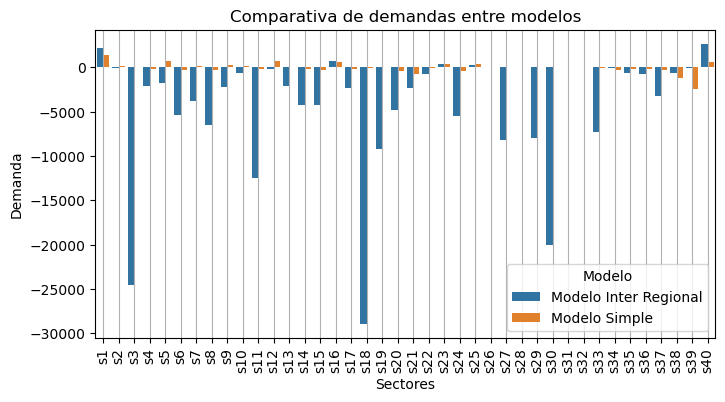

In [12]:
# Ploteo
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    data=df_analisis, x="Sectores", y="Demanda", hue="Modelo"
    )
ax.set_title("Comparativa de demandas entre modelos")
ax.tick_params(axis="x", rotation=90)
ax.grid(axis="x")

plt.show()

Vemos que la comparativa es bastante violenta por la diferencia que se genera entre ambas demandas. El modelo inter regional parece ser mucho menos demandante en el sentido de que la gran mayoría de sectores tienen gran diferencia pero en negativo, incluso hay sectores con demanda nula en el modelo simple que en el modelo inter regional pasan a ser grandes demandas negativas. Sumamos también el hecho de que los sectores 3 (minería para energía), 11 (textiles), 18 (productos químicos no fármacos) y 30 (vehículos) son aquellos que parecen englobar los valores más significativos. 

A partir de lo que vemos en la comparativa de demandas, sabemos que los *shocks* de demanda serán proporcionados a lo visto. Veamos ahora el $\Delta p$ para poder apreciar como el shock cambio a ambos modelos.

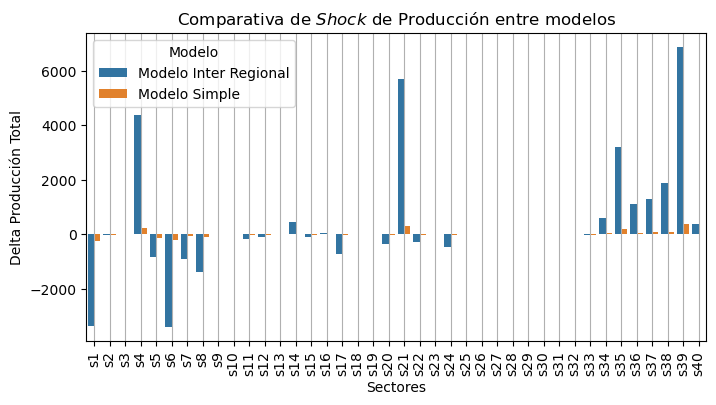

In [13]:
# Ploteo
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    data=df_analisis, x="Sectores", y="Delta Producción Total", hue="Modelo"
    )
ax.set_title("Comparativa de $\t{Shock}$ de Producción entre modelos")
ax.tick_params(axis="x", rotation=90)
ax.grid(axis="x")

plt.show()

Se observa que el $\Delta P$ del modelo inter regional supone un aumento considerable en sectores. Vemos que los sectores más afectados son el 4, 21, 35 y 39, con un delta positivo. Un detalle no menor a destacar es que hay correspondencia en ambos modelos al signo de la producción pero no a la magnitud, aunque con excepciones como el sector 14 y el 40. Podemos concluir de cierto modo que ambos sistemas llevan tienen un comportamiento subyacente similar pero manejan magnitudes sumamente diferentes en cuanto a sus demandas y producciones, siendo la del modelo inter regional una mucho mayor. Esto se puede deber una posible similitud entre Guatemala y Nicaragua y que, además, estamos asumiendo que la demanda de Nicaragua es nula y consecuentemente se produzca una retroalimentación entre sectores de estos países que logren una demanda de tal magnitud en negativo. 